In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from library.sb_utils import save_file

In [2]:
bank_data = pd.read_csv('data/BankChurners.csv')

In [3]:
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#drop 2 Naive Bayes columns as they will not be used
bank_data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are no missing values in any of the columns.

In [6]:
bank_data.rename(columns={'CLIENTNUM': 'Customer_ID'}, inplace=True)
bank_data.head()

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
bank_data.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


We will list all the unique values and their counts for each categorical feature.

In [8]:
bank_data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [9]:
bank_data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [10]:
bank_data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [11]:
bank_data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [12]:
bank_data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

As we can see, there are 'Unknown' values in each of educational level, marital status, and income category columns. Since we are trying to determine which type of customers are most likely to get churned on credit cards, we need information from at least one of these 3 categorical features. Therefore, we'll remove the records that have Unknown value for all 3 columns.

In [13]:
#remove records with 'Unknown' educational level, marital status, AND income category
bank_data = bank_data.drop(bank_data[(bank_data['Education_Level'] == 'Unknown') & (bank_data['Marital_Status'] == 'Unknown') & (bank_data['Income_Category'] == 'Unknown')].index)
bank_data

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

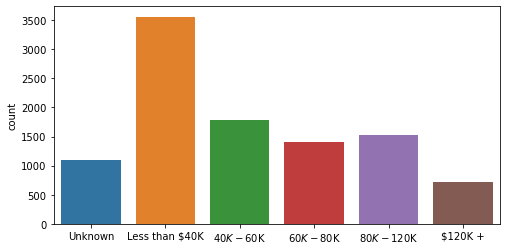

In [14]:
# Plotting income categories on a countplot
k = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
sorted_income_cat = sorted(bank_data['Income_Category'], key=k.index)
plt.figure(figsize=(8,4))
sns.countplot(sorted_income_cat)
plt.show

In [15]:
# Format summary statistics to suppress scientific notations
bank_data.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,10120.00000,739185385.21838,36910595.24893,708082083.00000,713037051.75000,717927333.00000,773159770.50000,828343083.00000
Customer_Age,10120.00000,46.32846,8.01358,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10120.00000,2.34625,1.29847,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10120.00000,35.92964,7.98686,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10120.00000,3.81206,1.55451,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10120.00000,2.34121,1.01071,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10120.00000,2.45543,1.10653,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10120.00000,8632.21286,9090.97122,1438.30000,2555.00000,4549.00000,11063.25000,34516.00000
Total_Revolving_Bal,10120.00000,1162.68162,814.88130,0.00000,360.00000,1276.00000,1783.25000,2517.00000
Avg_Open_To_Buy,10120.00000,7469.53124,9092.73136,3.00000,1323.50000,3473.00000,9855.50000,34516.00000


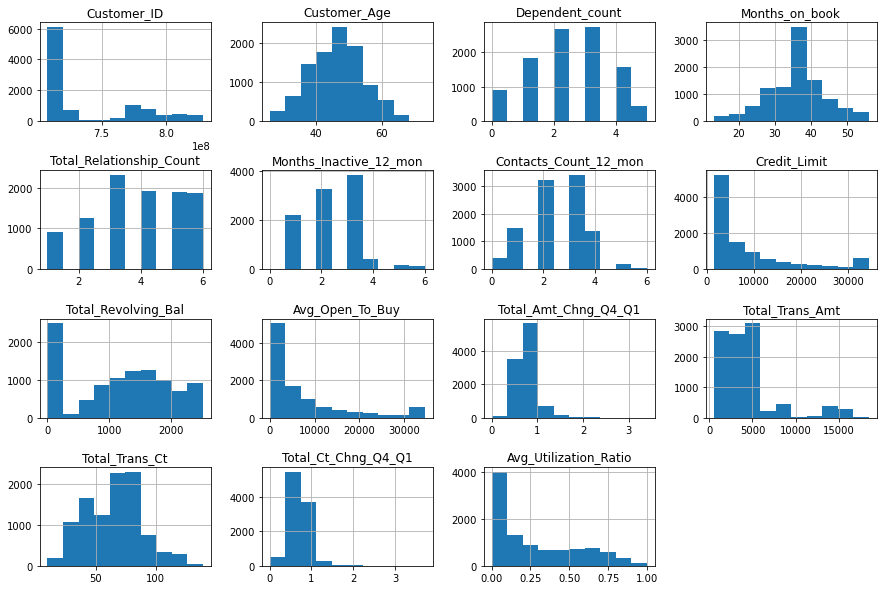

In [16]:
bank_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

There seems to be no clear outliers in any of the numerical features. Some columns have values closer to 0, such as Credit_Limit, Total_Revolving_Balance, Avg_Open_To_Buy, Avg_Utilization_Ratio.

In [29]:
# Get the number of customers with income of $60K or less
bank_data[(bank_data['Income_Category'] == 'Less than $40K') | (bank_data['Income_Category'] == '$40K - $60K')].shape[0]

5351

<AxesSubplot:>

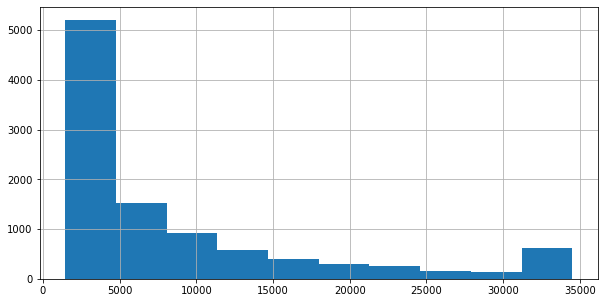

In [31]:
bank_data['Credit_Limit'].hist(figsize=(10,5))

In [47]:
# Check to see if there are rows with 0 revolving balance but at least 1 transaction in the last 12 months
bank_data[(bank_data['Total_Revolving_Bal'] == 0) & (bank_data['Total_Trans_Ct'] > 0)]

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.0
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,...,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.0
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.0
24,789124683,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,...,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,...,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.0
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,...,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.0
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,15,...,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.0


There are more than 5351 people earning \\$60K or less per year. Since a credit card limit usually correlates with an applicant\'s annual income, it is plausible to have more than 5,000 people with credit limits on the lower end (less than $5,000). 

Also, it is not unusual that a lot of people might not use their credit cards, or they might pay off the amount owed on their cards before the end of the billing cycle, hence the low card revolving balance, open-to-buy, and utilization ratio.

In [48]:
bank_data[bank_data['Credit_Limit'] > 30000].groupby(['Card_Category'])['Income_Category'].value_counts()

Card_Category  Income_Category
Blue           $120K +            159
               $80K - $120K       145
Gold           $60K - $80K         28
               $80K - $120K        21
               $120K +             17
               Unknown              8
Platinum       Unknown              5
               $120K +              4
               $60K - $80K          4
               $80K - $120K         2
Silver         $80K - $120K       117
               $120K +             59
               Unknown             53
               $60K - $80K         45
Name: Income_Category, dtype: int64

It is noticeable that the credit limit chart has a spike at the end, meaning the number of customers with credit limit over \\$30,000 is comparably higher than a few other ranges that come before them in the chart. Upon investigation, we can see that most of the customers with credit limit over \\$30,000 have annual incomes higher than \\$80,000.

In [49]:
bank_data.shape

(10120, 21)

In [ ]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)